<h3>DASC 2113 - Final Exam</h3>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tools import add_constant
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron

In [2]:
#Read in csv and creating dataframe
df = pd.read_csv("Data/Covid Data.csv")
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In this data set 97 and 98 are null values 

1 is yes and 2 is no

9999-99-99 means the patient did not die

c:\Users\sebas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Value Counts of Death')

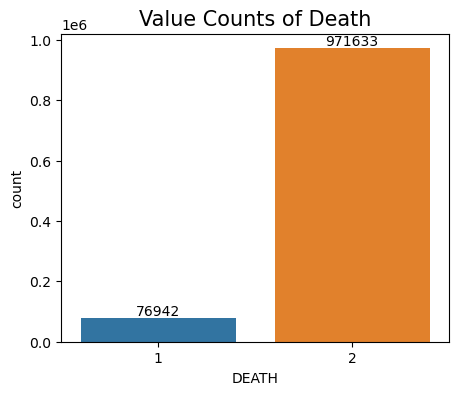

In [3]:
# Creating a new Column DEATH to say if the patiend died or not 1 = died 2 = lived
df.loc[df["DATE_DIED"] == '9999-99-99', 'DEATH'] = 2
df["DEATH"].fillna(1, inplace = True)
df['DEATH'] = df['DEATH'].astype(np.int64)

#Num of Deaths graph
plt.figure(figsize = (5,4))
ax = sns.countplot(df.DEATH)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Value Counts of Death", fontsize = 15)

c:\Users\sebas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Value Counts of Pregnant')

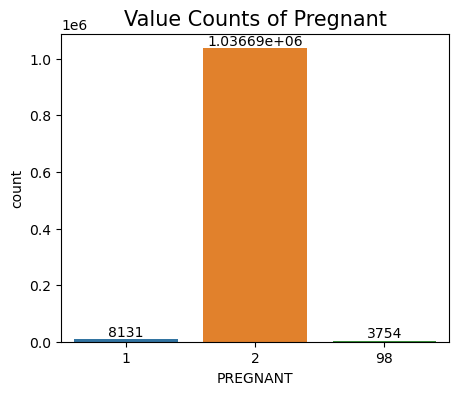

In [4]:
#If sex is male changing pregnant to no
df.loc[df["SEX"] == 2, "PREGNANT"] = 2

#Num of Pregnant graph
plt.figure(figsize = (5,4))
ax = sns.countplot(df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Value Counts of Pregnant", fontsize = 15)

c:\Users\sebas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Value Counts of HAS_COVID')

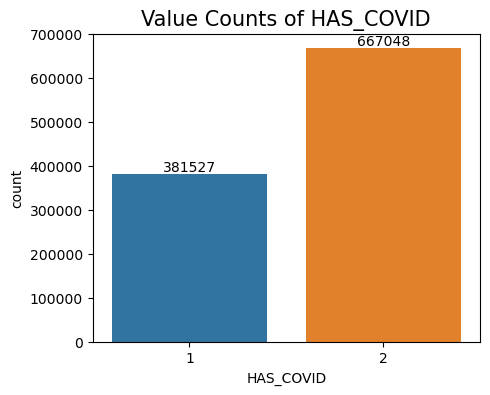

In [5]:
# Creating a new column to more easily determine if the patient had covid
df.loc[df["CLASIFFICATION_FINAL"] == 1|2|3, 'HAS_COVID'] = 1
df["HAS_COVID"].fillna(2, inplace = True)
df['HAS_COVID'] = df['HAS_COVID'].astype(np.int64)

#Num of HAS_COVID graph
plt.figure(figsize = (5,4))
ax = sns.countplot(df.HAS_COVID)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Value Counts of HAS_COVID", fontsize = 15)


c:\Users\sebas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Value Counts of SEV_AF')

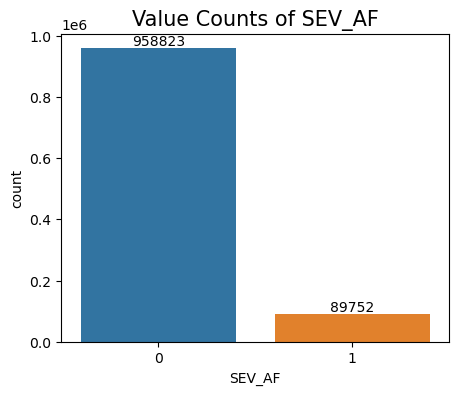

In [6]:
# Creating a new column called SEV_AF to easily see if the patient was severely affected by covid
# Severely Affected means the patient died, they got put into the ICU, or was placed on a ventalator
df["SEV_AF"] = np.where((df["DEATH"] == 1) | (df["ICU"] == 1) | (df["INTUBED"] == 1), 1, 0)
df['SEV_AF'] = df['SEV_AF'].astype(np.int64)

#Num of SEV_AF graph
plt.figure(figsize = (5,4))
ax = sns.countplot(df.SEV_AF)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Value Counts of SEV_AF", fontsize = 15)

In [7]:
#Eliminating all columns with null values and only looking if the patient had covid
df = df.loc[(df.SEX == 1) | (df.SEX == 2)]
df = df.loc[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df.loc[(df.PREGNANT == 1) | (df.PREGNANT == 2)]
df = df.loc[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df.loc[(df.COPD == 1) | (df.COPD == 2)]
df = df.loc[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df.loc[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df.loc[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df.loc[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df.loc[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df.loc[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df.loc[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df.loc[(df.TOBACCO == 1) | (df.TOBACCO == 2)]
df = df.loc[(df.HAS_COVID == 1)]

In [8]:
#Splitting the data frame into dependent and indpendent or x and y
df_x = df[['PNEUMONIA','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']]
df_x = df_x.replace([2], 0)
df_y = pd.DataFrame().assign(SEV_AF=df['SEV_AF'])
df_x.insert(1, "AGE", df['AGE'])
df_x

,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,1,65,0,0,0,0,0,1,0,0,0,0,0
2,0,55,0,1,0,0,0,0,0,0,0,0,0
4,0,68,0,1,0,0,0,1,0,0,0,0,0
5,1,40,0,0,0,0,0,0,0,0,0,0,0
6,0,64,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,0,77,0,1,0,0,1,1,0,0,0,0,0
1047934,0,55,0,1,0,0,0,0,0,0,0,0,0
1047935,0,70,0,0,0,0,0,1,0,0,0,0,0
1047936,0,32,0,0,0,0,0,0,0,0,0,0,0


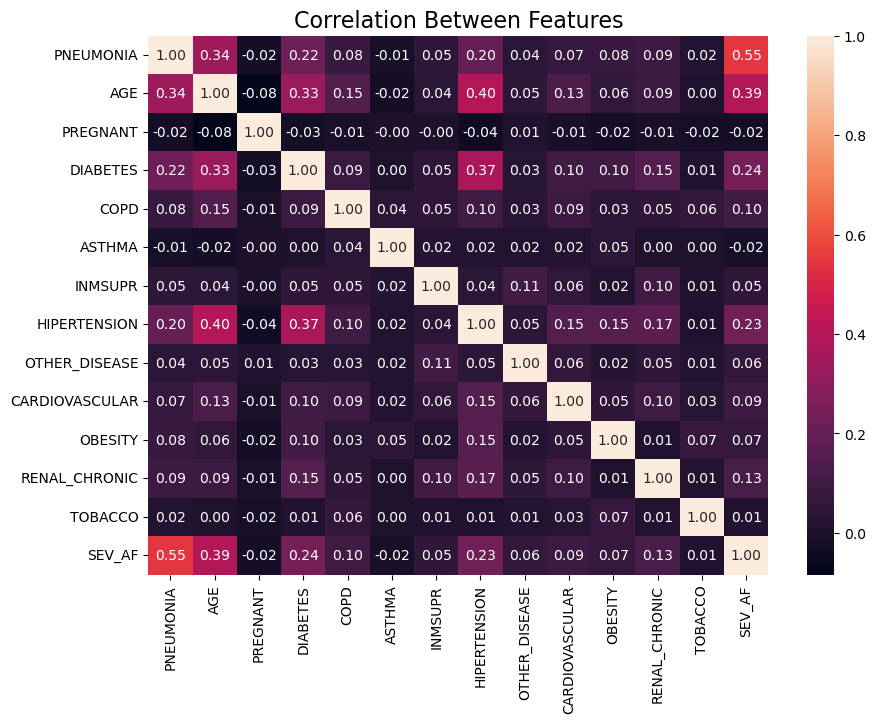

In [9]:
#Creating heatmap matrix of correlation to determine which columns have low correlation
matrix = df_x.join(df_y)
plt.figure(figsize=(10,7))
sns.heatmap(matrix.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=16)
plt.savefig('correlation_heatmap.png')
plt.show()

From this correlation heatmap I will be looking at the SEV_AF column because this is variable, I want to be able to predict. These values can fluctuate from -1 to 1 with values closer to 1 being more positively correlated to the variable. I'm planning on removing variables with a correlation of 0.07 and less so this includes "PREGNANT", "ASTHMA", "INMSUPR", "OTHER_DISEASE", "OBESITY", and "TOBACCO". I'm doing this to help with the performance of my models so they can run faster since these variables have little effect on the accuracy of the models. From this graphic we can also see if the patient has Pneumonia is the most positively correlated to SEV_AF 

In [10]:
#dropping the low correlation columns
low_correlation = ["PREGNANT","ASTHMA","INMSUPR","OTHER_DISEASE","OBESITY","TOBACCO"]
df_x.drop(columns=low_correlation,inplace=True)

In [11]:
# Splitting dataframe into test and training sets, Split into 80% train and 20% test set
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size = .20, random_state = 22)

# Print the shape of the trainining data 
print("Training data shape: ", train_x.shape, train_y.shape)

# Print the shape of the test set
print("Test data shape: ", test_x.shape, test_y.shape)

# Reset index & Drop index column
train_x.reset_index(inplace = True)
train_y.reset_index(inplace = True)
test_x.reset_index(inplace = True)
test_y.reset_index(inplace = True)
train_x = train_x.drop("index", axis = 1)
train_y = train_y.drop("index", axis = 1)
test_x = test_x.drop("index", axis = 1)
test_y = test_y.drop("index", axis = 1)


Training data shape:  (301902, 7) (301902, 1)
Test data shape:  (75476, 7) (75476, 1)


After looking online I found a six different models that I thought were interesting. So I wanted to see which models performed better than others and where each model performed well and also where it did not. I will do this by looking at and comparing Accuracy Score, ROC AUC Score, Precision Score, Sensitivity (Recall) Score, Specificity Score, F1 Score, MSE, RMSE, R2, and looking at their Confusion Matrix

<h4><u>Perceptron</u></h4>

In [12]:
# Create Model
model1=Perceptron(random_state=22)
model1.fit(train_x,train_y.values.ravel())
pred1 = model1.predict(test_x)

# Calculate Accuracy Score & ROC AUC Score
acc_test = accuracy_score(test_y, pred1)
roc_test = roc_auc_score(test_y, pred1)

#Calculate Precision Score & Sensitivity (Recall) Score & Specificity Score & F1 Score
prec_test = metrics.precision_score(test_y, pred1)
sens_test = metrics.recall_score(test_y, pred1)
spec_test = metrics.recall_score(test_y, pred1, pos_label=0)
f1_test = metrics.f1_score(test_y, pred1)

# Calculate MSE & Calculate RMSE & Calcualte R2
mse_test = mean_squared_error(test_y, pred1)
rmse_test = mean_squared_error(test_y, pred1, squared = False)
r2_test = r2_score(test_y, pred1)

#Put results into dataframe so its easier to read
Perceptron_results = pd.DataFrame(['Perceptron', acc_test, roc_test, prec_test, sens_test, spec_test, f1_test, mse_test, rmse_test, r2_test]).transpose()
Perceptron_results.columns = ['Method','Accuracy Score','ROC AUC Score','Precision_score','Sensitivity (Recall)','Specificity','F1-score','MSE','RMSE','R2']

<h4><u>PassiveAggressiveClassifier</u></h4>

In [13]:
# Create Model
model2=PassiveAggressiveClassifier(random_state=22)
model2.fit(train_x,train_y.values.ravel())
pred2 = model2.predict(test_x)

# Calculate Accuracy Score & ROC AUC Score
acc_test = accuracy_score(test_y, pred2)
roc_test = roc_auc_score(test_y, pred2)

#Calculate Precision Score & Sensitivity (Recall) Score & Specificity Score & F1 Score
prec_test = metrics.precision_score(test_y, pred2)
sens_test = metrics.recall_score(test_y, pred2)
spec_test = metrics.recall_score(test_y, pred2, pos_label=0)
f1_test = metrics.f1_score(test_y, pred2)

# Calculate MSE & Calculate RMSE & Calcualte R2
mse_test = mean_squared_error(test_y, pred2)
rmse_test = mean_squared_error(test_y, pred2, squared = False)
r2_test = r2_score(test_y, pred2)

#Put results into dataframe so its easier to read
PassiveAggressiveClassifier_results = pd.DataFrame(['PassiveAggressiveClassifier', acc_test, roc_test, prec_test, sens_test, spec_test, f1_test, mse_test, rmse_test, r2_test]).transpose()
PassiveAggressiveClassifier_results.columns = ['Method','Accuracy Score','ROC AUC Score','Precision_score','Sensitivity (Recall)','Specificity','F1-score','MSE','RMSE','R2']

<h4><u>LogisticRegression</u></h4>


In [14]:
# Create Model
model3=LogisticRegression(max_iter=1500, random_state=22)
model3.fit(train_x,train_y.values.ravel())
pred3 = model3.predict(test_x)

# Calculate Accuracy Score & ROC AUC Score
acc_test = accuracy_score(test_y, pred3)
roc_test = roc_auc_score(test_y, pred3)

#Calculate Precision Score & Sensitivity (Recall) Score & Specificity Score & F1 Score
prec_test = metrics.precision_score(test_y, pred3)
sens_test = metrics.recall_score(test_y, pred3)
spec_test = metrics.recall_score(test_y, pred3, pos_label=0)
f1_test = metrics.f1_score(test_y, pred3)

# Calculate MSE & Calculate RMSE & Calcualte R2
mse_test = mean_squared_error(test_y, pred3)
rmse_test = mean_squared_error(test_y, pred3, squared = False)
r2_test = r2_score(test_y, pred3)

#Put results into dataframe so its easier to read
LogisticRegression_results = pd.DataFrame(['LogisticRegression', acc_test, roc_test, prec_test, sens_test, spec_test, f1_test, mse_test, rmse_test, r2_test]).transpose()
LogisticRegression_results.columns = ['Method','Accuracy Score','ROC AUC Score','Precision_score','Sensitivity (Recall)','Specificity','F1-score','MSE','RMSE','R2']

<h4><u>RidgeClassifier</u></h4>


In [15]:
# Create Model
model4=RidgeClassifier(random_state=22)
model4.fit(train_x,train_y.values.ravel())
pred4 = model4.predict(test_x)

# Calculate Accuracy Score & ROC AUC Score
acc_test = accuracy_score(test_y, pred4)
roc_test = roc_auc_score(test_y, pred4)

#Calculate Precision Score & Sensitivity (Recall) Score & Specificity Score & F1 Score
prec_test = metrics.precision_score(test_y, pred4)
sens_test = metrics.recall_score(test_y, pred4)
spec_test = metrics.recall_score(test_y, pred4, pos_label=0)
f1_test = metrics.f1_score(test_y, pred4)

# Calculate MSE & Calculate RMSE & Calcualte R2
mse_test = mean_squared_error(test_y, pred4)
rmse_test = mean_squared_error(test_y, pred4, squared = False)
r2_test = r2_score(test_y, pred4)

#Put results into dataframe so its easier to read
RidgeClassifier_results = pd.DataFrame(['RidgeClassifier', acc_test, roc_test, prec_test, sens_test, spec_test, f1_test, mse_test, rmse_test, r2_test]).transpose()
RidgeClassifier_results.columns = ['Method','Accuracy Score','ROC AUC Score','Precision_score','Sensitivity (Recall)','Specificity','F1-score','MSE','RMSE','R2']

<h4><u>SGDClassifier</u></h4>


In [20]:
# Create Model
model5=SGDClassifier(random_state=22)
model5.fit(train_x,train_y.values.ravel())
pred5 = model5.predict(test_x)

# Calculate Accuracy Score & ROC AUC Score
acc_test = accuracy_score(test_y, pred5)
roc_test = roc_auc_score(test_y, pred5)

#Calculate Precision Score & Sensitivity (Recall) Score & Specificity Score & F1 Score
prec_test = metrics.precision_score(test_y, pred5)
sens_test = metrics.recall_score(test_y, pred5)
spec_test = metrics.recall_score(test_y, pred5, pos_label=0)
f1_test = metrics.f1_score(test_y, pred5)

# Calculate MSE & Calculate RMSE & Calcualte R2
mse_test = mean_squared_error(test_y, pred5)
rmse_test = mean_squared_error(test_y, pred5, squared = False)
r2_test = r2_score(test_y, pred5)

#Put results into dataframe so its easier to read
SGDClassifier_results = pd.DataFrame(['SGDClassifier', acc_test, roc_test, prec_test, sens_test, spec_test, f1_test, mse_test, rmse_test, r2_test]).transpose()
SGDClassifier_results.columns = ['Method','Accuracy Score','ROC AUC Score','Precision_score','Sensitivity (Recall)','Specificity','F1-score','MSE','RMSE','R2']

<h4><u>KNeighborsClassifier</u></h4>


In [17]:
# Create Model
model6=KNeighborsClassifier()
model6.fit(train_x,train_y.values.ravel())
pred6 = model6.predict(test_x)

# Calculate Accuracy Score & ROC AUC Score
acc_test = accuracy_score(test_y, pred6)
roc_test = roc_auc_score(test_y, pred6)

#Calculate Precision Score & Sensitivity (Recall) Score & Specificity Score & F1 Score
prec_test = metrics.precision_score(test_y, pred6)
sens_test = metrics.recall_score(test_y, pred6)
spec_test = metrics.recall_score(test_y, pred6, pos_label=0)
f1_test = metrics.f1_score(test_y, pred6)

# Calculate MSE & Calculate RMSE & Calcualte R2
mse_test = mean_squared_error(test_y, pred6)
rmse_test = mean_squared_error(test_y, pred6, squared = False)
r2_test = r2_score(test_y, pred6)

#Put results into dataframe so its easier to read
KNeighborsClassifier_results = pd.DataFrame(['KNeighborsClassifier', acc_test, roc_test, prec_test, sens_test, spec_test, f1_test, mse_test, rmse_test, r2_test]).transpose()
KNeighborsClassifier_results.columns = ['Method','Accuracy Score','ROC AUC Score','Precision_score','Sensitivity (Recall)','Specificity','F1-score','MSE','RMSE','R2']


<h4><u>ConfusionMatrixDisplay</u></h4>

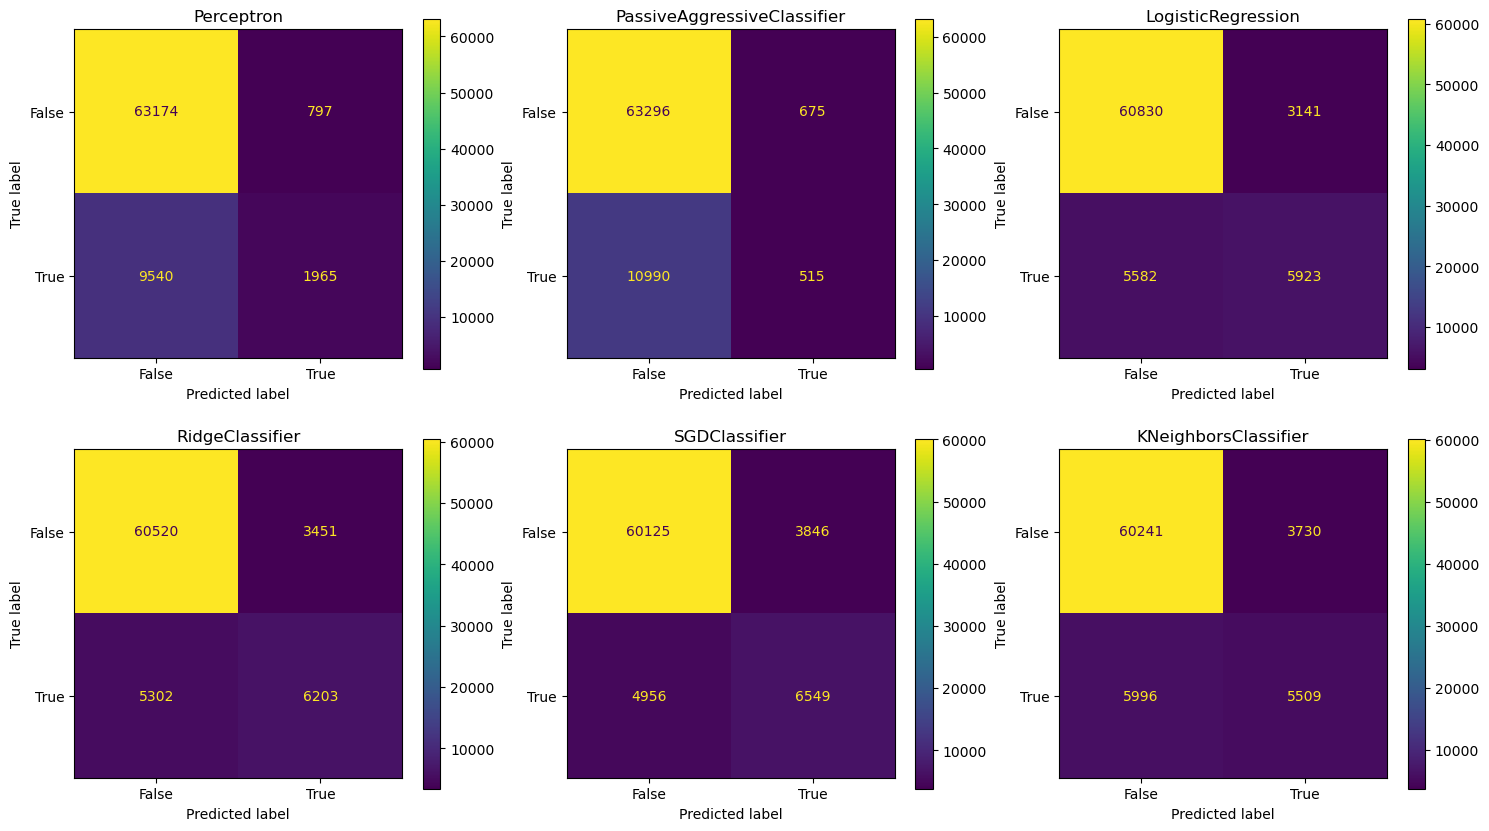

In [18]:
#Creating the confusion matrix
fig, ax = plt.subplots(2,3, figsize = (18,10))
ax[0,0].set_title("Perceptron")
ax[0,1].set_title("PassiveAggressiveClassifier")
ax[0,2].set_title("LogisticRegression")
ax[1,0].set_title("RidgeClassifier")
ax[1,1].set_title("SGDClassifier")
ax[1,2].set_title("KNeighborsClassifier")

ConfusionMatrixDisplay(
confusion_matrix = confusion_matrix(test_y, pred1), 
display_labels = [False, True]).plot(ax=ax[0,0])

ConfusionMatrixDisplay(
confusion_matrix = confusion_matrix(test_y, pred2), 
display_labels = [False, True]).plot(ax=ax[0,1])

ConfusionMatrixDisplay(
confusion_matrix = confusion_matrix(test_y, pred3), 
display_labels = [False, True]).plot(ax=ax[0,2])

ConfusionMatrixDisplay(
confusion_matrix = confusion_matrix(test_y, pred4), 
display_labels = [False, True]).plot(ax=ax[1,0], values_format='')

ConfusionMatrixDisplay(
confusion_matrix = confusion_matrix(test_y, pred5), 
display_labels = [False, True]).plot(ax=ax[1,1], values_format='')

ConfusionMatrixDisplay(
confusion_matrix = confusion_matrix(test_y, pred6),
display_labels = [False, True]).plot(ax=ax[1,2], values_format='')
plt.savefig('confusion_matrix.png')
plt.show()

In [53]:
#Combining each models data frame together
model_scores = pd.concat([Perceptron_results,PassiveAggressiveClassifier_results,LogisticRegression_results,RidgeClassifier_results,SGDClassifier_results,KNeighborsClassifier_results])
model_scores

,Method,Accuracy Score,ROC AUC Score,Precision_score,Sensitivity (Recall),Specificity,F1-score,MSE,RMSE,R2
0,Perceptron,0.863043,0.579168,0.711441,0.170795,0.987541,0.275461,0.136957,0.370078,-0.060068
0,PassiveAggressiveClassifier,0.845448,0.517106,0.432773,0.044763,0.989448,0.081134,0.154552,0.393132,-0.196255
0,LogisticRegression,0.884427,0.73286,0.653464,0.51482,0.9509,0.575915,0.115573,0.339961,0.105449
0,RidgeClassifier,0.884029,0.742605,0.642532,0.539157,0.946054,0.586323,0.115971,0.340545,0.102373
0,SGDClassifier,0.88338,0.754555,0.630014,0.569231,0.939879,0.598082,0.11662,0.341496,0.097348
0,KNeighborsClassifier,0.871138,0.710264,0.596277,0.478835,0.941692,0.531142,0.128862,0.358974,0.002591


<h3>Analysis</h3>

Each Confusion Matrix created has four different quadrants:
<ul>
    <li>True Negative (Top-Left Quadrant): Cases where the model correctly predicted the patient was not at risk
    <li>False Positive "Type 1 Error" (Top-Right Quadrant): Cases where the model predicted that the patient was at risk when in fact they were not at risk
    <li>False Negative "Type 2 Error" (Bottom-Left Quadrant): Cases where the model predicted that the patient was not at risk when in fact they were at risk
    <li>True Positive (Bottom-Right Quadrant): Cases where the model correctly predicted when the patient was at risk
</ul>



<h4><u>Perceptron:</u></h4>
    <li>In this model there is a very high amount of FN "In the 9,000" and TN. While there are a small amount of FP and TP "Less than 3,000 combined"</li><br>
    <li>This means the model is over predicting the number of negative values meaning that model is over classifying and saying the patient is not at risk when in fact they are</li><br>
    <li>Because of the high amount of FN I would say that this is not a good model for what we are trying to predict</li><br>
    <li>If we look at the Accuracy Score, we can see that it is around 0.86. This is a bit misleading because the model over classifies the number of patients not a risk because there are a significantly greater amount of patients not at risk than there is at risk in the data. This is the case because accuracy score measures the ratio of the sum of TP and TN out of all the predictions made</li><br>
    <li>Now looking at the ROC AUC Score we can see that it is close to 0.58 "The second lowest ROC AUC Score", this is an extremely low ROC AUC score and very close to 0.5 "0.5 means the model cannot tell the difference between the classes". This means that the model is struggling to make a distinction between the two classes. This further confirms what we interpreted with the Confusion Matrix</li><br>
    <li>Next if we look at the Precision Score, we can see it has the largest score of all the models at 0.71. This score strictly looks at the TP and FP and not either of the negatives. The reason this score is so high is that the model mostly predicts that the patient is not at risk but if it does in the off chance predict that you are at risk then you most likely are compared to other models</li><br>
    <li>If we now look at the Sensitivity or Recall we can see that it is around 0.17, the second lowest compared to other models. The reason this value is so low is because Sensitivity (Recall) measures how good the model is at predicting positives. And as I said before the model overpredicts negatives</li><br>
    <li>Now looking at Specificity we can see that it is close to 0.98, the second highest compared to other models. Specificity does the opposite of Recall and looks how good the model is at predicting negatives, so this is why the value is so high because the model overpredicts negatives</li><br>
    <li>The F-Score of this model is around 0.28 making it the second lowest in this test. The F-score looks at both Precision and Sensitivity (Recall), so it looks at both FP and FN. This score is low because if either Precision or Sensitivity (Recall) has a low value "Sensitivity (Recall) in this case" then the F-score will also be low. This shows that this model performed extremely poorly</li><br>
    <li>MSE and RMSE values of the different models are very similar. So, there is not much to say regarding these values besides that they all are between 0.11-0.15 for MSE and between 0.34-0.40 for MSE. MSE looks at the average of the square of the errors. The larger the number the larger the error and RMSE is just the square root of value gathered from the MSE function. With MSE & RMSE the lower the value the better a given model is able to "fit" a dataset, with a 0 value being perfect</li><br>
    <li>When looking at the models R-squared when can see that it is negative. This means the chosen model fits worse than a horizontal line (the null hypothesis)</li><br>
    <li>Overall, I think this is a very poor performing model. In my opinion and has the second worst performance compared to the others</li><br>


<h4><u>PassiveAggressiveClassifier:</u></h4>
    <li>In this model there is an even higher amount of FN than the previous model "Almost 11,000" and TN. While there are a small amount of FP and TP "A little over 1,000"</li><br>
    <li>This means the model is over predicting the amount of negative values "more so than the previous model" meaning that model is over classifying and saying the patient is not at risk when in fact they are</li><br>
    <li>Another interesting and unique observation about this Confusion Matrix compared to the others is that there are more FP than there are TP meaning that if the model predicts that patient is at high risk it is more likely to be incorrect then correct, the Precision Score reflects this</li><br>
    <li>Because of the high amount of FN I would say that this is also not a good model for what we are trying to predict</li><br>
    <li>If we look at the Accuracy Score, we can see that it is around 0.84 "the worst accuracy compared to the other models". Again, this is a bit misleading because the model over classifies the amount of patients not a risk. Also, there are a significantly greater amount of patients not at risk than there is at risk in the data. This is the case because accuracy score measures the ratio of the sum of TP and TN out of all the predictions made</li><br>
    <li>Now looking at the ROC AUC Score we can see that it is about 0.51 "The lowest ROC AUC Score", this is a horrible ROC AUC score and is basically 0.5 "0.5 means the model cannot tell the difference between the classes". This means that the model is struggling to make a distinction between the two classes. This further confirms what we interpreted with the Confusion Matrix</li><br>
    <li>Next if we look at the Precision Score, we can see it has the lowest score of all the models at 0.43. This score strictly looks at the TP and FP and not either of the negatives. The reason this score is so low is that the model mostly predicts that the patient is not at risk but if it does on the off chance predict that you are at risk then it most likely wrong in its prediction compared to other models. Another reason the Precision Score is low is because there are more FP than TP, so the score reflects that</li><br>
    <li>If we now look at the Sensitivity or Recall we can see that it is around 0.04, which is the lowest compared to other models. The reason this value is so low is because Sensitivity (Recall) measures how good the model is at predicting positives. And as I said before the model overpredicts negatives. Also, the amount of TP is lower than any other quadrant</li><br>
    <li>Now looking at Specificity we can see that it is close to 0.98, the highest compared to other models. Specificity does the opposite of Recall and looks how good the model is at predicting negatives, so this is why the value is so high because the model overpredicts negatives</li><br>
    <li>The F-Score of this model is around 0.08 making it the lowest in this test by far. The F-score looks at both Precision and Sensitivity (Recall), so it looks at both FP and FN. This score is low because if either Precision or Sensitivity (Recall) has a low value "Sensitivity (Recall) in this case" then the F-score will also be low. This shows that this model performed extremely poorly</li><br>
    <li>Again the MSE and RMSE values of the different models are very similar. So, there is not much to say regarding these values besides that they all are between 0.11-0.15 for MSE and between 0.34-0.40 for MSE. MSE looks at the average of the square of the errors. The larger the number the larger the error and RMSE is just the square root of value gathered from the MSE function. With MSE & RMSE the lower the value the better a given model is able to "fit" a dataset, with a 0 value being perfect</li><br>
    <li>When looking at the models R-squared when can see that it is negative. This means the chosen model fits worse than a horizontal line (the null hypothesis) and it is slightly worse than the previous model</li><br>
    <li>Overall, I think this is a very poor performing model, in my opinion and has the worst performance compared to the others</li><br>


<h4><u>LogisticRegression:</u></h4>
    <li>Looking at this confusion matrix you can immediately see that the model is performing better than the two prior ones because there is not significantly higher amount of FP or FN compared to TP or TN</li><br>
    <li>In this model there is a slightly higher amount of TP than there is of FN. Also, there is a higher amount of FN than FP</li><br>
    <li>So this means the model is over leaning towards predicting negative values. Not as bad as the previous models but more so than leaning towards positive. Meaning that model is more likely to say the patient is not at risk than at risk</li><br>
    <li>Just by looking at the Confusion Matrix I would say that this one of the better performing models compared to the others and definitely the best performing so far</li><br>
    <li>If we look at the Accuracy Score, we can see that it is around 0.88 "this is the highest Accuracy slightly" but this is a bit misleading because it still over classifying the amount of patients not a risk because there are a significantly greater amount of patients not at risk than there is at risk in the data. This is the case because accuracy score measures the ratio of the sum of TP and TN out of all the predictions made. Also, this score is misleading because according to this score it is the best performing model compared to the others, but overall other models perform better</li><br>
    <li>Now looking at the ROC AUC Score we can see that it is close to 0.73 "The third highest ROC AUC Score", this is a decent ROC AUC score and further away from 0.5 compared to the two previous models. This means that the model is doing a decent job at making a distinction between the two classes</li><br>
    <li>Next if we look at the Precision Score, we can see it has the second largest score of 0.65. This score strictly looks at the TP and FP and not either of the negatives. The reason this score is so high is that the model mostly predicts that the patient is not at risk but if it does predict that you are at risk then it fairly accurate compared to the other models</li><br>
    <li>If we now look at the Sensitivity or Recall we can see that it is around 0.51, the third highest compared to other models. The reason this value is higher is because Sensitivity (Recall) measures how good the model is at predicting positives. This model is better at telling difference between positives and negatives, but as I said before the model still leans towards predicting negatives less so than the previous two models but still some</li><br>
    <li>Now looking at Specificity we can see that it is close to 0.95, the third highest compared to other models. Specificity does the opposite of Recall and looks how good the model is at predicting negatives, so this is why the value is again so high because the model leans towards predicting negatives. Another reason this value is lower is because the Confusion Matrix is not as skewed towards the negative side</li><br>
    <li>The F-Score of this model is around 0.57 making it the third best in this test. The F-score looks at both Precision and Sensitivity (Recall), so it looks at both FP and FN. This score is better because the Precision and the Sensitivity (Recall) values are more closely related than previous models. This shows that this model performed better than other models but still not the best model</li><br>
    <li>MSE and RMSE values of the different models are very similar. So, there is not much to say regarding these values besides that they all are between 0.11-0.15 for MSE and between 0.34-0.40 for MSE. MSE looks at the average of the square of the errors. The larger the number the larger the error and RMSE is just the square root of value gathered from the MSE function. With MSE & RMSE the lower the value the better a given model is able to "fit" a dataset, with a 0 value being perfect</li><br>
    <li>When looking at the models R-squared when can see that it is very low. This means the chosen model has a weak relationship between the model and the dependent variable</li><br>
    <li>Overall, I think this is an ok performing model. In my opinion there are two other models that performed better than it</li><br>


<h4><u>RidgeClassifier:</u></h4>
    <li>Looking at this confusion matrix you can immediately see that the model is also performing better than the first two models because there is not significantly higher amount of FP or FN compared to TP or TN</li><br>
    <li>In this model there is a higher amount of TP than there is of FN more so than the previous model. Also, there is a higher amount of FN than FP. Finally, this model has the highest number of TP compared to the past three models and slightly more FP</li><br>
    <li>So this means the model is also kind of leaning towards predicting negative values. Not as bad as the previous models but more so than leaning towards positive. Meaning that model is more likely to say the patient is not at risk than at risk</li><br>
    <li>Just by looking at the Confusion Matrix I would say that this one of the better performing models compared to the others and is similar in its performance to the previous model, just slightly better in my opinion</li><br>
    <li>If we look at the Accuracy Score, we can see that it is again around 0.88 "this is in the top three best scores" but this is a bit misleading because it still over classifying the amount of patients not a risk because there are a significantly greater amount of patients not at risk than there is at risk in the data. This is the case because accuracy score measures the ratio of the sum of TP and TN out of all the predictions made. Also, this score is misleading because according to this score it is the one of the best performing models compared to the others, but I think overall another model performs better</li><br>
    <li>Now looking at the ROC AUC Score we can see that it is close to 0.74 "The second highest ROC AUC Score", this is a decent ROC AUC score and further away from 0.5 compared to the previous models. This means that the model is also doing a decent job at making a distinction between the two classes</li><br>
    <li>Next if we look at the Precision Score, we can see it has the third largest score of 0.64. This score strictly looks at the TP and FP and not either of the negatives. The reason this score is on the higher end of these models is that the model mostly predicts that the patient is not at risk but if it does predict that you are at risk then it is fairly accurate compared to the other models</li><br>
    <li>If we now look at the Sensitivity or Recall we can see that it is around 0.54, the second highest compared to other models. The reason this value is higher is because Sensitivity (Recall) measures how good the model is at predicting positives. This model is better at telling difference between positives and negatives, but as I said before the model still leans towards predicting negatives less so than the previous model but still some, that’s why the score is slightly higher than the previous one</li><br>
    <li>Now looking at Specificity we can see that it is close to 0.94, the third lowest compared to other models. Specificity does the opposite of Recall and looks how good the model is at predicting negatives, so this is why the value is again so high because the model leans towards predicting negatives. Another reason I believe this value is lower is because the Confusion Matrix is slightly less skewed towards the negative side than the previous model</li><br>
    <li>The F-Score of this model is around 0.58 making it the second best in this test. The F-score looks at both Precision and Sensitivity (Recall), so it looks at both FP and FN. This score is better because the Precision and the Sensitivity (Recall) values are more closely related than previous models. This shows that this model performed slightly better than the previous but still not the best model overall</li><br>
    <li>MSE and RMSE values of the different models are very similar. So, there is not much to say regarding these values besides that they all are between 0.11-0.15 for MSE and between 0.34-0.40 for MSE. MSE looks at the average of the square of the errors. The larger the number the larger the error and RMSE is just the square root of value gathered from the MSE function. With MSE & RMSE the lower the value the better a given model is able to "fit" a dataset, with a 0 value being perfect</li><br>
    <li>When looking at the models R-squared when can see that it is very low. This means the chosen model has a weak relationship between the model and the dependent variable</li><br>
    <li>Overall, I think this is an ok performing model. In my opinion there is one model that performed better than it</li><br>


<h4><u>SGDClassifier:</u></h4>
    <li>Looking at this confusion matrix you can immediately see that the model is also performing better than the first two models because there is not significantly higher amount of FP or FN compared to TP or TN</li><br>
    <li>In this model there is a higher amount of TP than there is of FN more so than the previous model. Also, there is a higher amount of FN than FP. Finally, this model has the highest number of TP compared to the past four models and slightly more FP</li><br>
    <li>So this means the model is also kind of leaning towards predicting negative values. Not as bad as the previous models but more so than leaning towards positive. Meaning that model is more likely to say the patient is not at risk than at risk</li><br>
    <li>Just by looking at the Confusion Matrix I would say that this one of the better performing models compared to the others and is similar in its performance to the previous two models, just slightly better in my opinion</li><br>
    <li>If we look at the Accuracy Score, we can see that it is again around 0.88 "this is in the top three best scores" but this is a bit misleading because it still over classifying the amount of patients not a risk because there are a significantly greater amount of patients not at risk than there is at risk in the data. This is the case because accuracy score measures the ratio of the sum of TP and TN out of all the predictions made</li><br>
    <li>Now looking at the ROC AUC Score we can see that it is close to 0.75 "The highest ROC AUC Score", this is a decent ROC AUC score and further away from 0.5 compared to all other models. This means that the model is also doing a decent job at making a distinction between the two classes</li><br>
    <li>Next if we look at the Precision Score, we can see it has the third lowest score of 0.63. This score strictly looks at the TP and FP and not either of the negatives. The reason this score is on the lower end of these models is that the model mostly predicts that the patient is not at risk but if it does predict that you are at risk then it is on the lesser end of the accuracy compared to the other models</li><br>
    <li>If we now look at the Sensitivity or Recall we can see that it is around 0.56, the highest compared to the other models. The reason this value is higher is because Sensitivity (Recall) measures how good the model is at predicting positives. This model is better at telling difference between positives and negatives, but as I said before the model still leans towards predicting negatives less so than the previous model but still some, that’s why the score is slightly higher than the previous one</li><br>
    <li>Now looking at Specificity we can see that it is close to 0.93, the lowest compared to other models. Specificity does the opposite of Recall and looks how good the model is at predicting negatives, so this is why the value is again so high because the model leans towards predicting negatives. Another reason I believe this value is lower is because the Confusion Matrix is slightly less skewed towards the negative side than the previous model</li><br>
    <li>The F-Score of this model is around 0.6 making it the best in this test. The F-score looks at both Precision and Sensitivity (Recall), so it looks at both FP and FN. This score is better because the Precision and the Sensitivity (Recall) values are more closely related than previous models. This shows that this model performed slightly better than the previous</li><br>
    <li>MSE and RMSE values of the different models are very similar. So, there is not much to say regarding these values besides that they all are between 0.11-0.15 for MSE and between 0.34-0.40 for MSE. MSE looks at the average of the square of the errors. The larger the number the larger the error and RMSE is just the square root of value gathered from the MSE function. With MSE & RMSE the lower the value the better a given model is able to "fit" a dataset, with a 0 value being perfect</li><br>
    <li>When looking at the models R-squared when can see that it is very low. This means the chosen model has a weak relationship between the model and the dependent variable</li><br>
    <li>Overall, I think this is an ok performing model. In my opinion this is the best preforming model of the six models</li><br>


<h4><u>KNeighborsClassifier:</u></h4>
    <li>Looking at this confusion matrix you can immediately see that the model is also performing better than the first two models because there is not significantly higher amount of FP or FN compared to TP or TN</li><br>
    <li>In this model there is a slightly lower amount of TP than there is of FN "similar to the first two model". Also, there is a higher amount of FN than FP. Finally, this model has the third lowest number of TP, only higher than the first two models</li><br>
    <li>So this means the model is also kind of leaning towards predicting negative values. Not as bad as the first two models and slightly worse than the past three models. Meaning that model is more likely to say the patient is not at risk than at risk</li><br>
    <li>Just by looking at the Confusion Matrix I would say that this one of the bottom performing models compared to the others</li><br>
    <li>If we look at the Accuracy Score, we can see that it is again around 0.87 "this is in the top three bottom scores" but this is a bit misleading because it still over classifying the amount of patients not a risk because there are a significantly greater amount of patients not at risk than there is at risk in the data. This is the case because accuracy score measures the ratio of the sum of TP and TN out of all the predictions made</li><br>
    <li>Now looking at the ROC AUC Score we can see that it is close to 0.71 "The third lowest ROC AUC Score", this is a decent ROC AUC score and further away from 0.5 compared to the first two models. This means that the model is also doing a decent job at making a distinction between the two classes</li><br>
    <li>Next if we look at the Precision Score, we can see it has the second smallest score of 0.59. This score strictly looks at the TP and FP and not either of the negatives. The reason this score is on the lower end of these models is that the model mostly predicts that the patient is not at risk but if it does predict that you are at risk then it is not that accurate compared to the other models</li><br>
    <li>If we now look at the Sensitivity or Recall we can see that it is around 0.47, the third lowest compared to other models. The reason this value is lower is because Sensitivity (Recall) measures how good the model is at predicting positives. This model is better at telling difference between positives and negatives, but as I said before the model still leans towards predicting negatives less so than the first two models but more so then the last three models</li><br>
    <li>Now looking at Specificity we can see that it is close to 0.94, the second lowest compared to other models. Specificity does the opposite of Recall and looks how good the model is at predicting negatives, so this is why the value is again so high because the model leans towards predicting negatives. Another reason I believe this value is lower is because the Confusion Matrix is slightly less skewed towards the negative side than the first two models but slightly more than the last three models</li><br>
    <li>The F-Score of this model is around 0.53 making it the third worst in this test. The F-score looks at both Precision and Sensitivity (Recall), so it looks at both FP and FN. This score is less because the Precision and the Sensitivity (Recall) values are less closely related than the previous three models. This shows that this model performed slightly worse than the previous two</li><br>
    <li>MSE and RMSE values of the different models are very similar. So, there is not much to say regarding these values besides that they all are between 0.11-0.15 for MSE and between 0.34-0.40 for MSE. MSE looks at the average of the square of the errors. The larger the number the larger the error and RMSE is just the square root of value gathered from the MSE function. With MSE & RMSE the lower the value the better a given model is able to "fit" a dataset, with a 0 value being perfect</li><br>
    <li>When looking at the models R-squared when can see that it is very low. This means the chosen model has a weak relationship between the model and the dependent variable</li><br>
    <li>Overall, I think this is not a good performing model. In my opinion this is the third worse preforming model</li><br>

